In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
df = pd.read_csv("BostonHousing.csv")

In [94]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [95]:
predict = 'medv'
X = np.array(df.drop([predict], axis=1))
Y = np.array(df[predict])

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
from scipy.stats import zscore

df_zscore = df.apply(zscore)
df_zscore

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [98]:
outliers = df_zscore[(df_zscore.abs() > 3).any(axis=1)]
print(outliers)

         crim        zn     indus      chas       nox        rm       age  \
55  -0.418992  3.375039 -1.446951 -0.272599 -1.310392  1.373892 -1.659786   
56  -0.418126  3.160441 -1.516987 -0.272599 -1.249924  0.140137 -1.169050   
57  -0.418851  3.804234 -1.432360 -0.272599 -1.241285  0.757015 -0.998360   
102 -0.393896 -0.487722 -0.375976 -0.272599 -0.299707  0.171480  0.598310   
141 -0.230987 -0.487722  1.568995 -0.272599  0.598679 -1.803097  1.117494   
..        ...       ...       ...       ...       ...       ...       ...   
454  0.686614 -0.487722  1.015999 -0.272599  1.367490  0.631645  0.907687   
455  0.132531 -0.487722  1.015999 -0.272599  1.367490  0.342439  0.637427   
456  0.122809 -0.487722  1.015999 -0.272599  1.367490 -0.439699  0.687212   
457  0.533811 -0.487722  1.015999 -0.272599  1.367490 -0.496685  0.416951   
466  0.018789 -0.487722  1.015999 -0.272599  0.866467 -0.473890  0.573418   

          dis       rad       tax   ptratio         b     lstat      medv  

In [ ]:
df = df.drop(index=outliers.index)

print("original df:", df.shape)
print("df after deleting noises:", df.shape)

original df: (415, 14)
df after deleting noises: (415, 14)


In [100]:
from sklearn import preprocessing

normalized_df = preprocessing.normalize(df)
print(normalized_df)

[[1.26243020e-05 3.59552904e-02 4.61426227e-03 ... 7.92814154e-01
  9.94763036e-03 4.79403873e-02]
 [5.77925202e-05 0.00000000e+00 1.49613006e-02 ... 8.39906675e-01
  1.93417662e-02 4.57092068e-02]
 [5.84112194e-05 0.00000000e+00 1.51325512e-02 ... 8.40809063e-01
  8.62576820e-03 7.42715029e-02]
 ...
 [1.23619418e-04 0.00000000e+00 2.42722128e-02 ... 8.07513938e-01
  1.14748768e-02 4.86258078e-02]
 [2.24416632e-04 0.00000000e+00 2.44300613e-02 ... 8.05700556e-01
  1.32696393e-02 4.50512447e-02]
 [9.68927614e-05 0.00000000e+00 2.43815786e-02 ... 8.11152436e-01
  1.61045130e-02 2.43202670e-02]]


In [ ]:
EPOCH = 30
best = 0
for i in range(EPOCH):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    mymodel = linear_model.LinearRegression()
    mymodel.fit(x_train, y_train)
    score = mymodel.score(x_test, y_test)
    if score > best:
        best = score

    y_pred = mymodel.predict(x_test)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(mymodel, X, Y, cv=kf, scoring='r2')

print(scores)

[0.66875949 0.7342547  0.70986601 0.77595168 0.68727731]


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared value = {r2}")

R-squared value = 0.7848022503165013


In [104]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE value = {mse}")
print(f"RMSE value = {rmse}")

MSE value = 20.20589404320397
RMSE value = 4.495096666725196


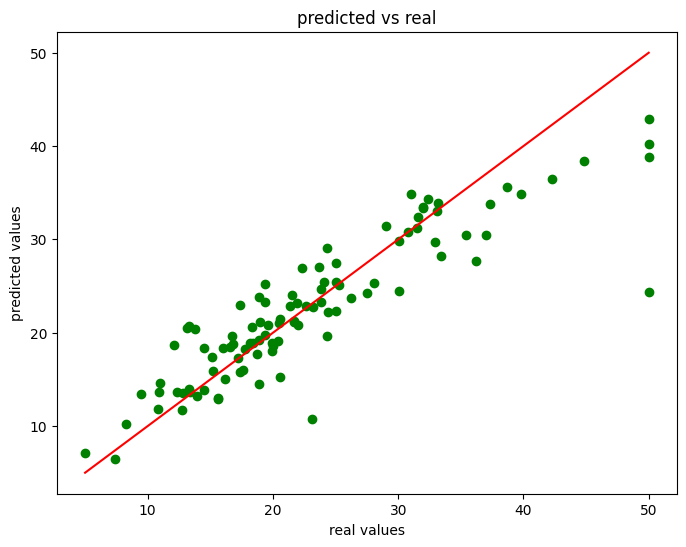

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green')

plt.title('predicted vs real')
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()